Importuję biblioteki i wczytuję dane z pliku.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

drinks = pd.read_csv("drinks.csv")
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


Wybieram kraje które nie wykazują spożycia alkoholu:

In [2]:
drinks.sort_values("total_litres_of_pure_alcohol").set_index(drinks.index+1)[["country","total_litres_of_pure_alcohol"]].loc[lambda df: df['total_litres_of_pure_alcohol'] == 0]

,country,total_litres_of_pure_alcohol
1,Afghanistan,0.0
2,San Marino,0.0
3,Pakistan,0.0
4,North Korea,0.0
5,Bangladesh,0.0
6,Monaco,0.0
7,Marshall Islands,0.0
8,Maldives,0.0
9,Mauritania,0.0
10,Kuwait,0.0


Wybieram kraj, który spożywa najwięcej alkoholu:

In [3]:
drinks.sort_values("total_litres_of_pure_alcohol",0,False).set_index(drinks.index+1)[["country","total_litres_of_pure_alcohol"]].head(1)


,country,total_litres_of_pure_alcohol
1,Belarus,14.4


TOP10 krajów z największą ilością picia poszczególnych kategorii alkoholu

In [4]:
piwo = drinks.sort_values("beer_servings",0,False).set_index(drinks.index+1)[["country","beer_servings"]].head(10)
wodka = drinks.sort_values("spirit_servings",0,False).set_index(drinks.index+1)[["country","spirit_servings"]].head(10)
wino = drinks.sort_values("wine_servings",0,False).set_index(drinks.index+1)[["country","wine_servings"]].head(10)
result = pd.concat([piwo, wodka, wino], axis=1)
result.index.name="Miejsce w rankingu"
result

,country,beer_servings,country,spirit_servings,country,wine_servings
Miejsce w rankingu,,,,,,
1,Namibia,376,Grenada,438,France,370
2,Czech Republic,361,Belarus,373,Portugal,339
3,Gabon,347,Haiti,326,Andorra,312
4,Germany,346,Russian Federation,326,Switzerland,280
5,Lithuania,343,St. Lucia,315,Denmark,278
6,Poland,343,Guyana,302,Slovenia,276
7,Venezuela,333,Slovakia,293,Luxembourg,271
8,Ireland,313,Dominica,286,Croatia,254
9,Palau,306,Thailand,258,Italy,237


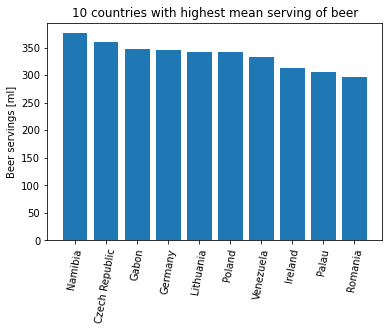

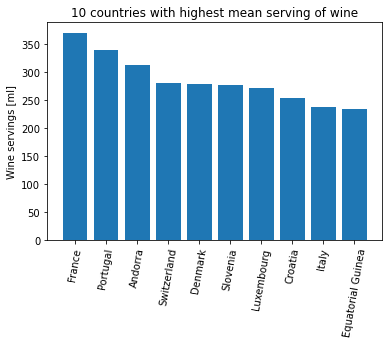

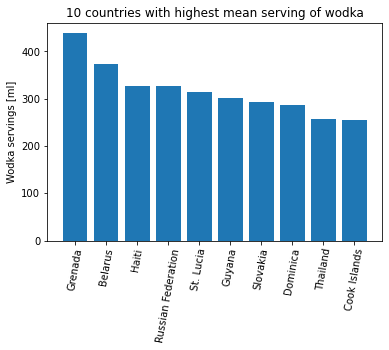

In [21]:
plt.figure()

x=[x for x in range(len(piwo.values[:,1]))]
plt.bar(x,piwo.values[:,1])
plt.xticks(x,piwo.values[:,0],rotation=80)
plt.ylabel("Beer servings [ml]")
plt.title("10 countries with highest mean serving of beer")

plt.show()


plt.figure()

x=[x for x in range(len(wino.values[:,1]))]
plt.bar(x,wino.values[:,1])
plt.xticks(x,wino.values[:,0],rotation=80)
plt.ylabel("Wine servings [ml]")
plt.title("10 countries with highest mean serving of wine")

plt.show()

plt.figure()

x=[x for x in range(len(wodka.values[:,1]))]
plt.bar(x,wodka.values[:,1])
plt.xticks(x,wodka.values[:,0],rotation=80)
plt.ylabel("Wodka servings [ml]")
plt.title("10 countries with highest mean serving of wodka")

plt.show()